# Polynomial curve fitting
The task is to use a polynomial interpolate a curve.
I will use a neural network approch to find an estimate for the coefficients of each term. 

In this task the function we want to estimate is the sin(x) function.
In neural network, everything returned by this function is called the 'observed value'.

In [ ]:
import matplotlib.pyplot as plt
from math import sin, pi, cos

In [ ]:
def observe_function(x):
    return sin(x)

This function creates a polynomial with degree of d, depending on the number of coefficients and will be kept constant throughout this program. 

In [ ]:
def func_definition(coefficients):
    def func_eval(x):
        return sum([coeff * x**power for power, coeff in enumerate(coefficients)])
    return func_eval

## Loss function
In this task, the aim is to find a value for each coefficients such that they makes our polynomial return the best estimate of what a sin function would return given an input x. (Within a certain region, in this program 0<x<2pi)
The 'loss function' is a more mathematicly rigorous method of defining how good our estimates are. 
It returns a numerical value of which 0 represent our estimates matches exactly with our observation.

In [ ]:
def loss(observed_values, predicted_values) -> int:
    # In here I used the 'square loss function'. This is just an arbitary choice.
    # Do note that different loss function is suitable for different tasks. 
    # Do note that the derivative of the loss function needs to be computed if you are using 'gradient descent' to update the your weight.
    return sum([(observed_values[i] - predicted_values[i])**2 for i in range(len(observed_values))])

## Training function
This function is used to optimise our neural network. \
Gradient descent is used to update the weight and below is the definition \
$w \leftarrow w - \eta \times \frac{\partial L}{\partial w}$ \
w: weight maxtrix \
$\eta$(eta): Learning rate \
L: Loss function 
### How to find $\frac{\partial L}{\partial w}$?
We call the method of finding $\frac{\partial L}{\partial w}$ 'backpropagation'. All it is is applying chain rule to differentiate the loss function. \
Recall our definition for L: $L(y,\hat{y}) = (y - \hat{y})^2$ \
y: observed value \
$\hat{y}$(y hat): predicted value \
Recall our definition for $\hat{y}$ is a polynomial of degree d, which can be written neatly in matrix form. \
$\hat{y} = w_0 + w_1 x + ... + w_{d-1} x^{d-1} + w_d x^d = 
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{d-1} \\
w_d
\end{bmatrix} \cdot 
\begin{bmatrix}
x^0 \\
x^1 \\
\vdots \\
x^{d-1} \\
x^d
\end{bmatrix}
$ \
Now apply chian rule:
$\frac{\partial L}{\partial w} = 2(y -\hat{y}) \otimes 
\begin{bmatrix}x^0 & x^1 & \dots & x^{d-1} & x^d\end{bmatrix}$ \
Note $\otimes$ denotes element-wise multiplication. \
You might also notices that $\begin{bmatrix}x^0 & x^1 & \dots & x^{d-1} & x^d\end{bmatrix}$ is the tranposed matrix of $\begin{bmatrix}x^0 \\x^1 \\\vdots \\x^{d-1} \\x^d\end{bmatrix}$ The reason for this is ommited in this program, it is just a rule when differentiating with matrix. 
### Learning rate $\eta$
The value for learning rate is highly dependent on your task. \
It is generally between 1E-2 - 1E-9. \
Value too high will result in 'exploding gradient' problem. \
Value too low will result in 'vanishing gradient' problem. 

In [ ]:
updated_weight = list
inputs = [0, 0.25, 0.5, 1, 1.25, 1.5, 2, 2.5, 3, pi, 3.5, 4, 4.25, 4.5, 5, 5.25, 5.5, 6, 2*pi]

# Since the inputs are raised to high degree of power, it is a common practice to normalise your inputs to ensure convergence. 
normalised_inputs = [x / (2 * pi) for x in inputs]  # Scale between 0 and 1

In [ ]:
def update_weight(current_weight) -> updated_weight:
    
    f = func_definition(current_weight)

    observed_values = list(map(observe_function, inputs))
    predicted_values = list(map(f, normalised_inputs))
    
    a = 3e-2

    def element_wise_add(mat_a,mat_b):
        return [mat_a[i] + mat_b[i] for i in range(len(mat_a))]
    def element_wise_min(mat_a,mat_b):
        return [mat_a[i] - mat_b[i] for i in range(len(mat_a))]
    def const_multiply_mat(const, mat):
        return [const*element for element in mat]

    resultant_dL_dw  = [0 for d in range(degree)]
    for i, x in enumerate(normalised_inputs):
        dy_dw = [x**d for d in range(degree)]
        dL_dw = const_multiply_mat(2*(predicted_values[i]-observed_values[i]), dy_dw)
        resultant_dL_dw = element_wise_add(resultant_dL_dw, dL_dw)
    updated_weight = element_wise_min(current_weight, const_multiply_mat(a, resultant_dL_dw))
    return updated_weight

In [ ]:
my_initial_coefficients = [0,0,0,0,0,0]
degree = len(my_initial_coefficients)
next_weight = update_weight(my_initial_coefficients)
for t in range(10000):
    next_weight = update_weight(next_weight)

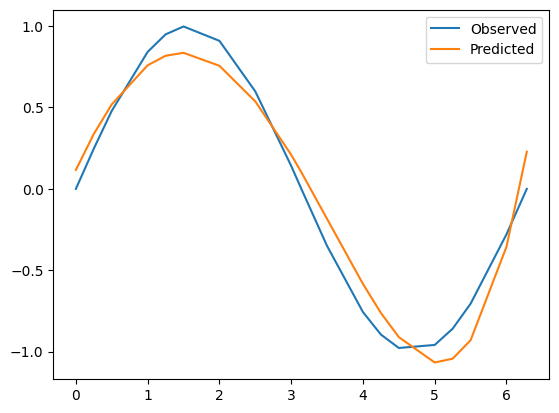

[0.11627168068501843, 6.06057500549673, -12.336108816471846, -3.076332012786117, 4.108462655057213, 5.355095676198918]


In [ ]:
plt.plot(inputs, list(map(observe_function, inputs)), label="Observed")
plt.plot(inputs, list(map(func_definition(next_weight), normalised_inputs)), label="Predicted")
plt.legend()
plt.show()
print(next_weight)

## The essence of neural network
A neural network essentially convert a problem into a task of finding the minimum for the loss function, which is a problem we can solve systematically. \
Though the term neural network has connotation with the network in our brain made up of neurons, that is in hindersight. (I think so personally). 
